Load ACS data into dataframes.  Join and save pickled result

### DP02 misc data




In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.discrete import discrete_model

In [2]:
DP02 = pd.read_csv('Data/ACS_14_5YR_DP02.csv', skiprows=0)

In [3]:
DP02 = DP02.iloc[1:,:].copy()

In [4]:
DP02.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC216,HC04_VC216,HC01_VC217,HC02_VC217,HC03_VC217,HC04_VC217,HC01_VC218,HC02_VC218,HC03_VC218,HC04_VC218
1,0600000US3400100000,3400100000,"County subdivisions not defined, Atlantic Coun...",0,12,0,NaN,0,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0600000US3400100100,3400100100,"Absecon city, Atlantic County, New Jersey",3247,181,3247,NaN,2289,177,70.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0600000US3400102080,3400102080,"Atlantic City city, Atlantic County, New Jersey",15847,443,15847,NaN,8605,368,54.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0600000US3400107810,3400107810,"Brigantine city, Atlantic County, New Jersey",4379,198,4379,NaN,2612,161,59.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0600000US3400108680,3400108680,"Buena borough, Atlantic County, New Jersey",1751,152,1751,NaN,1193,106,68.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
misc = DP02[['GEO.id2', 'GEO.display-label', 
          'HC03_VC12','HC03_VC06','HC03_VC09','HC03_VC11','HC01_VC21',
          'HC01_VC56', 'HC01_VC57', 'HC01_VC58',
          'HC03_VC95', 'HC03_VC96', 
          'HC03_VC101', 'HC03_VC109', 'HC03_VC112', 'HC03_VC115', 
          'HC03_VC120', 'HC03_VC121', 'HC03_VC126', 'HC03_VC132', 'HC03_VC133', 'HC03_VC141', 'HC03_VC171'
         ]].copy()
misc.columns = ['FIPS', 'city_town',
                'p_nonfamily', 'p_marrfam', 'p_malehh','p_femhh','avg_hh_size',
                'fert_age15_19','fert_age20_34','fert_age35_50',
                'p_highsch','p_bachdeg',
                'p_civvet', 'p_civdis_18','p_civdis_1864','p_civdis_65',
                'p_samehouse','p_diffhousUS', 'p_abroad1yr',
                'p_nativeUS', 'p_nativestate', 'p_nat_citz','p_spk_engl'
                
               ]

In [6]:
misc = misc.iloc[:,:2].join(misc.iloc[:,2:].apply(pd.to_numeric)).fillna(0)


In [7]:
misc.head()

,FIPS,city_town,p_nonfamily,p_marrfam,p_malehh,p_femhh,avg_hh_size,fert_age15_19,fert_age20_34,fert_age35_50,...,p_civdis_18,p_civdis_1864,p_civdis_65,p_samehouse,p_diffhousUS,p_abroad1yr,p_nativeUS,p_nativestate,p_nat_citz,p_spk_engl
1,3400100000,"County subdivisions not defined, Atlantic Coun...",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3400100100,"Absecon city, Atlantic County, New Jersey",29.5,54.1,3.8,4.9,2.54,0.0,81.0,25.0,...,0.5,7.2,32.8,91.2,8.7,0.1,86.6,61.0,60.0,82.5
3,3400102080,"Atlantic City city, Atlantic County, New Jersey",45.7,23.9,2.4,15.2,2.44,11.0,127.0,16.0,...,4.4,13.3,41.3,85.8,13.1,1.0,64.9,46.8,44.4,55.0
4,3400107810,"Brigantine city, Atlantic County, New Jersey",40.4,45.3,3.1,3.9,2.15,69.0,58.0,53.0,...,2.6,7.8,25.4,83.3,16.7,0.1,89.1,48.3,58.3,88.6
5,3400108680,"Buena borough, Atlantic County, New Jersey",31.9,46.3,3.2,7.3,2.62,0.0,75.0,15.0,...,1.8,19.5,46.9,92.7,6.4,0.9,87.1,67.8,54.9,71.7


In [8]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 23 columns):
FIPS             570 non-null object
city_town        570 non-null object
p_nonfamily      570 non-null float64
p_marrfam        570 non-null float64
p_malehh         570 non-null float64
p_femhh          570 non-null float64
avg_hh_size      570 non-null float64
fert_age15_19    570 non-null float64
fert_age20_34    570 non-null float64
fert_age35_50    570 non-null float64
p_highsch        570 non-null float64
p_bachdeg        570 non-null float64
p_civvet         570 non-null float64
p_civdis_18      570 non-null float64
p_civdis_1864    570 non-null float64
p_civdis_65      570 non-null float64
p_samehouse      570 non-null float64
p_diffhousUS     570 non-null float64
p_abroad1yr      570 non-null float64
p_nativeUS       570 non-null float64
p_nativestate    570 non-null float64
p_nat_citz       570 non-null float64
p_spk_engl       570 non-null float64
dtypes: float64(21), ob

In [9]:
misc.to_pickle('misc.pkl')

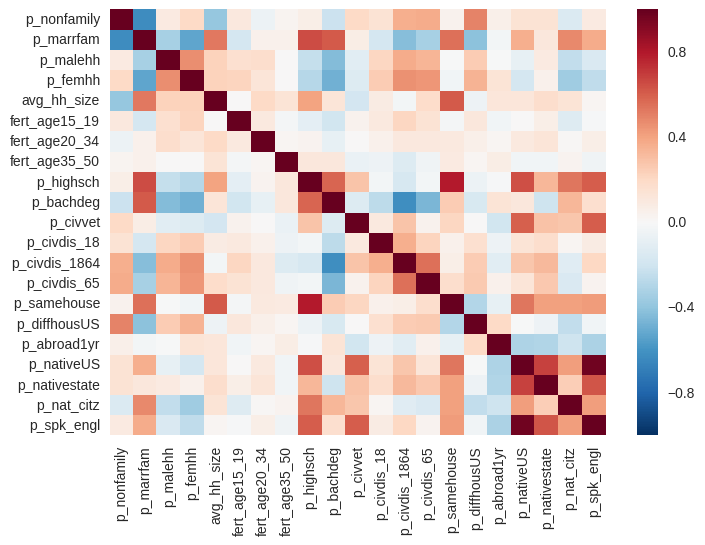

In [10]:
sb.heatmap(misc.corr());

In [14]:
from sklearn import preprocessing
X = misc.iloc[:,2:]
X = X[X[[0]] != 0]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 21 columns):
p_nonfamily      563 non-null float64
p_marrfam        0 non-null float64
p_malehh         0 non-null float64
p_femhh          0 non-null float64
avg_hh_size      0 non-null float64
fert_age15_19    0 non-null float64
fert_age20_34    0 non-null float64
fert_age35_50    0 non-null float64
p_highsch        0 non-null float64
p_bachdeg        0 non-null float64
p_civvet         0 non-null float64
p_civdis_18      0 non-null float64
p_civdis_1864    0 non-null float64
p_civdis_65      0 non-null float64
p_samehouse      0 non-null float64
p_diffhousUS     0 non-null float64
p_abroad1yr      0 non-null float64
p_nativeUS       0 non-null float64
p_nativestate    0 non-null float64
p_nat_citz       0 non-null float64
p_spk_engl       0 non-null float64
dtypes: float64(21)
memory usage: 93.6 KB


In [15]:
X_scaled = preprocessing.scale(X)
pd.DataFrame(X_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(pd.DataFrame(X_scaled).T.corr());